1 of 30
2 of 30
3 of 30
4 of 30
5 of 30
6 of 30
7 of 30
8 of 30
9 of 30
10 of 30
11 of 30
12 of 30
13 of 30
14 of 30
15 of 30
16 of 30
17 of 30
18 of 30
19 of 30
20 of 30
21 of 30
22 of 30
23 of 30
24 of 30
25 of 30
26 of 30
27 of 30
28 of 30
29 of 30
30 of 30


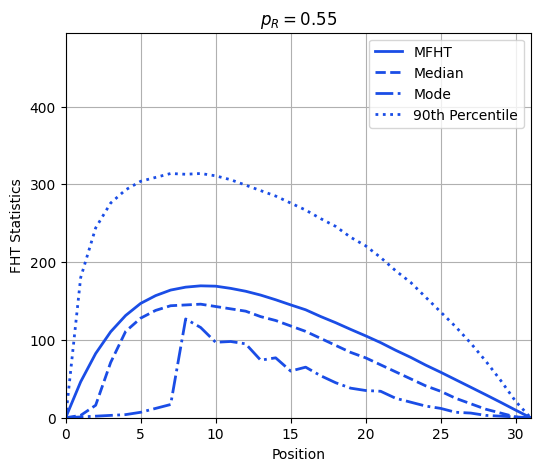

In [1]:
# Tristan Ursell
# Drunken Pirate Markov
# May 2024
#
# warning:  this is a stochastic simulation that brute force samples trajectories; depending on the parameters you choose, it may take a long time to simulate.
#

import numpy as np
import matplotlib.pyplot as plt

# Length of plank
L = 30

# Rightward step probability
p = 0.55

# Number of trials per position on the plank
T = 100000

# Maximum compute step (longer planks require higher Nmax)
Nmax = 2000

# Initiate trial matrix
Tmat = np.zeros((T, Nmax))

# Initiate data vectors
MFHT = np.zeros(L)
mode_vec = np.zeros(L)
median_vec = np.zeros(L)
prct_vec = np.zeros(L)

# Create edges and matrix for full histogram plot
edges = np.arange(0.5, 3 * ((L + 1) // 2) ** 2, 2)
FHT_probmat = np.zeros((len(edges) - 1, L))

# Loop over all starting positions
for i in range(1, L + 1):
    # Generate random moves matrix
    randmat = 2 * (np.random.rand(T, Nmax) > (1 - p)) - 1
    
    # Calculate differential path
    diffx = np.cumsum(randmat, axis=1)
    
    # Construct current paths
    paths_now = diffx + i
    
    # Apply LHS condition
    paths_0L = (paths_now == 0)
    
    # Apply RHS condition
    paths_0R = (paths_now == (L + 1))
    
    # Total paths toward absorption
    paths_0tot = paths_0L + paths_0R
    
    # Find first absorption time in each row
    fht = np.argmax(paths_0tot, axis=1) + 1
    
    # Calculate FHT statistics
    MFHT[i - 1] = np.mean(fht)
    mode_vec[i - 1] = np.argmax(np.bincount(fht))
    median_vec[i - 1] = np.median(fht)
    prct_vec[i - 1] = np.percentile(fht, 90)
    
    # Create probability matrix
    hist_vals, _ = np.histogram(fht, bins=edges, density=True)
    FHT_probmat[:, i - 1] = hist_vals
    
    print(f"{i} of {L}")

# Create figure x-vector
pos_vec = np.arange(L + 2)

# Create figure plot vectors (empty)
MFHT_plot = np.zeros(L + 2)
median_vec_plot = np.zeros(L + 2)
mode_vec_plot = np.zeros(L + 2)
prct_vec_plot = np.zeros(L + 2)

# Fill figure plot vectors
MFHT_plot[1:-1] = MFHT
median_vec_plot[1:-1] = median_vec
mode_vec_plot[1:-1] = mode_vec
prct_vec_plot[1:-1] = prct_vec

# Choose color
cmap1 = [0.1, 0.3, 0.9]

# Plot full FHT statistics
plt.figure(figsize=(6, 5))
plt.plot(pos_vec, MFHT_plot, '-', linewidth=2, color=cmap1, label='MFHT')
plt.plot(pos_vec, median_vec_plot, '--', linewidth=2, color=cmap1, label='Median')
plt.plot(pos_vec, mode_vec_plot, '-.', linewidth=2, color=cmap1, label='Mode')
plt.plot(pos_vec, prct_vec_plot, ':', linewidth=2, color=cmap1, label='90th Percentile')
plt.xlabel('Position')
plt.ylabel('FHT Statistics')
plt.title(f'$p_R = ${p}')
plt.box(True)
plt.xlim([0, L + 1])
plt.ylim([0, 2.2 * ((L + 1) // 2) ** 2])
plt.legend()
plt.grid()
plt.savefig(f'drunken_pirate_sim_p_R-{p}.svg', format='svg')
plt.show()
